In [11]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

### Problema 1

In [12]:
def rk4_vector(F, a, b, x0, n):
    """
    x0 = [t0, x, y] init value (x(t0), y(t0))
    """
    u = np.zeros((n + 1, len(x0)))
    u[0] = np.copy(x0)
    h = (b - a)/n
    for i in range(n):
        
        
        K1 = F(u[i])
        K2 = F(u[i] + 1/2*h*K1)
        K3 = F(u[i] + 1/2*h*K2)
        K4 = F(u[i] + h*K3)
        # Runge Kutta's method
        u[i + 1] = u[i] + 1/6*h*(K1 + 2*K2 + 2*K3 + K4)
    return u

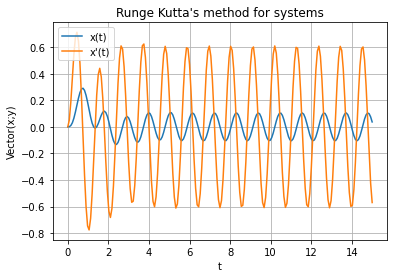

Runge Kutta's method order 4


,t[k],x(t[k]),v(t[k])
0,0.000,0.00000000000,0.00000000000
1,0.075,0.00132655814,0.05200124863
2,0.150,0.00992848233,0.18841579527
3,0.225,0.03070566379,0.36907499140
4,0.300,0.06519766126,0.54599677557
...,...,...,...
196,14.700,0.08998627889,0.31202766749
197,14.775,0.10421967114,0.06153643459
198,14.850,0.09892372190,-0.20048577433
199,14.925,0.07509081958,-0.42493980088


In [16]:
def F(x):
    A = 0.1
    k = 400
    m = 120
    w = 5.81778
    c = math.sqrt(k*m)
    dt = 1
    dx = x[2]
    dz = -c/m*x[2] - k/m*x[1] + A*w**2*np.sin(w*x[0])
    return np.array([dt, dx, dz])
    
a, b = 0, 15
n = 200
x0 = np.array([a, 0, 0])
u = rk4_vector(F, a, b, x0, n)

# plot
plt.title("Runge Kutta's method for systems")
plt.plot(u[:, 0], u[:, 1])
plt.plot(u[:, 0], u[:, 2])
plt.xlabel("t")
plt.ylabel("Vector(x;y)")
plt.legend(("x(t)", "x'(t)"))
plt.grid(True)
plt.show()

# print
np.set_printoptions(precision=10, suppress=True)
print("Runge Kutta's method order 4")
pd.set_option("display.precision", 11)
pd.DataFrame(data=u, index=range(len(u[:, 0])), columns=["t[k]", "x(t[k])",  "v(t[k])"])

### Problema 2